# _`expression`_.`automaton(`_`algo`_`="auto")`

Generate an automaton from an expression.

The _`algo`_ can be:
- `"auto"`: currently equivalent to `"expansion"`, eventually should mix `"standard"` for basic expressions (faster) and `"expansion"` otherwise (more general).
- `"derivation"`: use derivation-based [_expression_.derived_term](expression.derived_term.ipynb), trim and stripped.
- `"derived_term"`: same as `"expansion"`.
- `"inductive"`: use [_expression_.inductive](expression.inductive.ipynb).
- `"expansion"`: use expansion-based [_expression_.derived_term](expression.derived_term.ipynb), trim and stripped.
- `"standard"`: use [_expression_.standard](expression.standard.ipynb).
- `"thompson"`: use [_expression_.thompson](expression.thompson.ipynb).
- `"zpc"`: use [_expression_.zpc](expression.zpc.ipynb), trim.
- `"zpc,compact"`: use [_expression_.zpc](expression.zpc.ipynb), "compact" version, trim.

Precondition:
- `"standard"`, `"thompson"`, `"zpc"`, `"zpc,compact"`: the expression is not extended

See also:
- [_expression_.derived_term](expression.derived_term.ipynb)
- [_expression_.inductive](expression.inductive.ipynb)
- [_expression_.standard](expression.standard.ipynb)
- [_expression_.thompson](expression.thompson.ipynb)
- [_expression_.zpc](expression.zpc.ipynb)

## Examples

In [1]:
import vcsn
from IPython.display import display
e = vcsn.Q.expression('\e+<2>a+<3>b')
e

\e+<2>a+<3>b

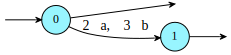

In [2]:
e.automaton('derived_term')

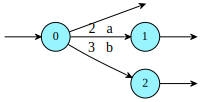

In [3]:
e.automaton('inductive')

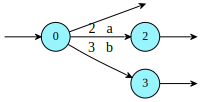

In [4]:
e.automaton('standard')

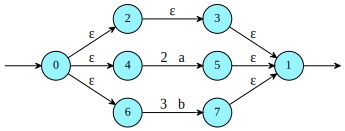

In [5]:
e.automaton('thompson')

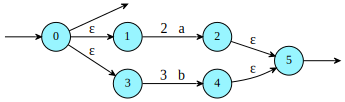

In [6]:
e.automaton('zpc')

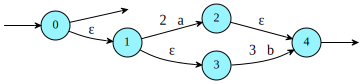

In [7]:
e.automaton('zpc,compact')

### Trimming
The automata are guaranteed to be trim, even if the algorithm used by `automaton` generated useless states.

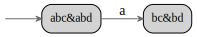

In [8]:
e = vcsn.Q.expression('abc&abd')
e.derived_term()

In [9]:
e.automaton('derived_term')

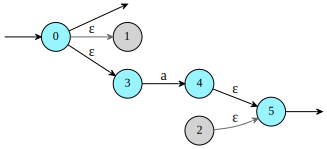

In [10]:
e = vcsn.Q.expression('a?')
e.zpc()

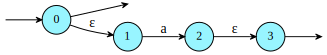

In [11]:
e.automaton('zpc')

### Extended Rational Expressions
The derived-term based algorithms and `"inductive"` support extended expressions.

expansion


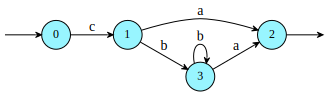

inductive


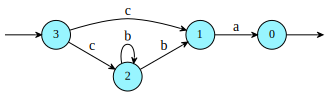

In [12]:
def aut(e):
    e = vcsn.context('[...] -> q').expression(e)
    for a in ['expansion', 'inductive']:
        print(a)
        display(e.automaton(a))
    
aut('(ab*c){T}')

expansion


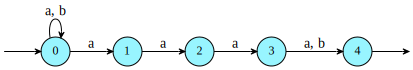

inductive


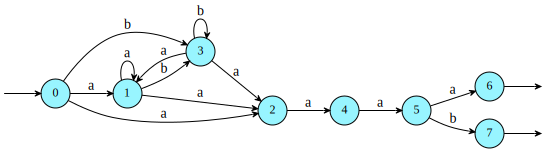

In [13]:
aut('[ab]*a[ab]{1} & [ab]*a[ab]{2} & [ab]*a[ab]{3}')

expansion


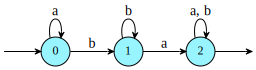

inductive


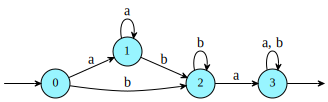

In [14]:
aut('(a*b*){c}')